In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx 
import pandas as pd

df = pd.read_csv('./datasets.csv', engine='python')
df1=df.head(250)
df2=df1.drop(0)
df2.head()

,%,asym,positive,Unnamed: 3,node1_name,node2_name,node1_gender,node2_gender,node1_age,node2_age,latitude,longitude
1,1,10.0,1.0,1.095136e+09,SHIVANI,KUSHAL,FEMALE,MALE,45-65,45-65,23.836049,91.279386
2,2,3.0,1.0,1.097725e+09,RAMDIN VERMA,ISHA,MALE,FEMALE,65+,18-45,19.094571,74.738432
3,4,4.0,1.0,1.098388e+09,SHARAT CHANDRAN,SHARAT CHANDRAN,MALE,MALE,45-65,45-65,23.025793,72.587265
4,5,5.0,1.0,1.098425e+09,SMT SHYANI DEVI,SMT SHYANI DEVI,FEMALE,FEMALE,65+,65+,23.836049,91.279386
5,2,3.0,1.0,1.098490e+09,RAMDIN VERMA,ISHA,MALE,FEMALE,65+,18-45,23.836049,91.279386


In [2]:
df3=df2.rename({"%":"node1","asym":"node2","positive":"edges", 'Unnamed: 3' : "time"},axis=1)
df3=df3.astype({'node1': 'int64'})
df3.dtypes
df3

,node1,node2,edges,time,node1_name,node2_name,node1_gender,node2_gender,node1_age,node2_age,latitude,longitude
1,1,10.0,1.0,1.095136e+09,SHIVANI,KUSHAL,FEMALE,MALE,45-65,45-65,23.836049,91.279386
2,2,3.0,1.0,1.097725e+09,RAMDIN VERMA,ISHA,MALE,FEMALE,65+,18-45,19.094571,74.738432
3,4,4.0,1.0,1.098388e+09,SHARAT CHANDRAN,SHARAT CHANDRAN,MALE,MALE,45-65,45-65,23.025793,72.587265
4,5,5.0,1.0,1.098425e+09,SMT SHYANI DEVI,SMT SHYANI DEVI,FEMALE,FEMALE,65+,65+,23.836049,91.279386
5,2,3.0,1.0,1.098490e+09,RAMDIN VERMA,ISHA,MALE,FEMALE,65+,18-45,23.836049,91.279386
...,...,...,...,...,...,...,...,...,...,...,...,...
245,91,164.0,1.0,1.112657e+09,SANTNA,PAWAN,FEMALE,MALE,45-65,65+,22.562600,88.363000
246,24,97.0,1.0,1.112680e+09,KHADAK SINGH,ANY BOBBY,MALE,FEMALE,18-45,45-65,24.827327,92.797868
247,185,186.0,1.0,1.112746e+09,VIDHI,RAJENDER,FEMALE,MALE,65+,18-45,22.562600,88.363000
248,201,201.0,1.0,1.112752e+09,RAKHI,RAKHI,FEMALE,FEMALE,18-45,18-45,23.182387,75.776433


In [3]:
df31=df3.copy()
df31

,node1,node2,edges,time,node1_name,node2_name,node1_gender,node2_gender,node1_age,node2_age,latitude,longitude
1,1,10.0,1.0,1.095136e+09,SHIVANI,KUSHAL,FEMALE,MALE,45-65,45-65,23.836049,91.279386
2,2,3.0,1.0,1.097725e+09,RAMDIN VERMA,ISHA,MALE,FEMALE,65+,18-45,19.094571,74.738432
3,4,4.0,1.0,1.098388e+09,SHARAT CHANDRAN,SHARAT CHANDRAN,MALE,MALE,45-65,45-65,23.025793,72.587265
4,5,5.0,1.0,1.098425e+09,SMT SHYANI DEVI,SMT SHYANI DEVI,FEMALE,FEMALE,65+,65+,23.836049,91.279386
5,2,3.0,1.0,1.098490e+09,RAMDIN VERMA,ISHA,MALE,FEMALE,65+,18-45,23.836049,91.279386
...,...,...,...,...,...,...,...,...,...,...,...,...
245,91,164.0,1.0,1.112657e+09,SANTNA,PAWAN,FEMALE,MALE,45-65,65+,22.562600,88.363000
246,24,97.0,1.0,1.112680e+09,KHADAK SINGH,ANY BOBBY,MALE,FEMALE,18-45,45-65,24.827327,92.797868
247,185,186.0,1.0,1.112746e+09,VIDHI,RAJENDER,FEMALE,MALE,65+,18-45,22.562600,88.363000
248,201,201.0,1.0,1.112752e+09,RAKHI,RAKHI,FEMALE,FEMALE,18-45,18-45,23.182387,75.776433


In [4]:
e=df3['node1'].max()
print(e)
e1=df3['time'].max()
print(e1)

df31['sum']=0
df31=df31.astype({'sum': 'float'})
for i in range(1,e):
    #print('p')
    for index,row in df31.iterrows():
       # print('k')
        if df31.at[index,'node1']==i:
           # print('j')
            if e1-df31.at[index,'time']<=106075:
                df31.at[index,'sum']=1
            elif e1-df31.at[index,'time']>106075 and e1-df31.at[index,'time']<1905075:
                df31.at[index,'sum']= (((e1-df31.at[index,'time'])/1905075)**2)+1
            else:
                df31.at[index,'sum']=0
            
            #df31.at[index,'sum']= (0.5**(((e1)-df31.at[index,'time'])/e1))
            #df31.at[index,'sum']+= 1

#df31.groupby(['node1','time']).sum()
#df31.groupby(['node1'])['sum'].agg('sum')

df31

202
1112753451.0


,node1,node2,edges,time,node1_name,node2_name,node1_gender,node2_gender,node1_age,node2_age,latitude,longitude,sum
1,1,10.0,1.0,1.095136e+09,SHIVANI,KUSHAL,FEMALE,MALE,45-65,45-65,23.836049,91.279386,0.0
2,2,3.0,1.0,1.097725e+09,RAMDIN VERMA,ISHA,MALE,FEMALE,65+,18-45,19.094571,74.738432,0.0
3,4,4.0,1.0,1.098388e+09,SHARAT CHANDRAN,SHARAT CHANDRAN,MALE,MALE,45-65,45-65,23.025793,72.587265,0.0
4,5,5.0,1.0,1.098425e+09,SMT SHYANI DEVI,SMT SHYANI DEVI,FEMALE,FEMALE,65+,65+,23.836049,91.279386,0.0
5,2,3.0,1.0,1.098490e+09,RAMDIN VERMA,ISHA,MALE,FEMALE,65+,18-45,23.836049,91.279386,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,91,164.0,1.0,1.112657e+09,SANTNA,PAWAN,FEMALE,MALE,45-65,65+,22.562600,88.363000,1.0
246,24,97.0,1.0,1.112680e+09,KHADAK SINGH,ANY BOBBY,MALE,FEMALE,18-45,45-65,24.827327,92.797868,1.0
247,185,186.0,1.0,1.112746e+09,VIDHI,RAJENDER,FEMALE,MALE,65+,18-45,22.562600,88.363000,1.0
248,201,201.0,1.0,1.112752e+09,RAKHI,RAKHI,FEMALE,FEMALE,18-45,18-45,23.182387,75.776433,1.0


In [5]:
k=df31.copy()
k=k.drop(["node2","edges","time"],axis=1)
kala= k.groupby('node1')
# kala.first()

aggregation_functions = {'sum': 'max'}
df_new = k.groupby(k['node1']).aggregate(aggregation_functions)
df_new

,sum
node1,
1,0.000000
2,0.000000
4,0.000000
5,1.539111
6,0.000000
...,...
197,1.017434
198,1.016031
200,1.006165


In [6]:
df4=df3.drop(columns="time")

df4.head()

,node1,node2,edges,node1_name,node2_name,node1_gender,node2_gender,node1_age,node2_age,latitude,longitude
1,1,10.0,1.0,SHIVANI,KUSHAL,FEMALE,MALE,45-65,45-65,23.836049,91.279386
2,2,3.0,1.0,RAMDIN VERMA,ISHA,MALE,FEMALE,65+,18-45,19.094571,74.738432
3,4,4.0,1.0,SHARAT CHANDRAN,SHARAT CHANDRAN,MALE,MALE,45-65,45-65,23.025793,72.587265
4,5,5.0,1.0,SMT SHYANI DEVI,SMT SHYANI DEVI,FEMALE,FEMALE,65+,65+,23.836049,91.279386
5,2,3.0,1.0,RAMDIN VERMA,ISHA,MALE,FEMALE,65+,18-45,23.836049,91.279386


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
# weighted MultiGraph
#M = nx.MultiGraph()
def from_pandas_dataframe(df, col_from, col_to, col_weight=None, nodes=None):
    """Construct a digraph from dataframe.

    :param df: dataframe contains edge/relation information
    :param col_from: dataframe column name for start of edge
    :param col_to: dataframe column name for end of edge
    :param col_weight: dataframe column name for col_weight, defaults 1 if not provided
    :param nodes: nodes for the graph, default to use nodes from df if not provided
    :return:
    """
    g = nx.MultiDiGraph()

    # add nodes
    if not nodes:
        nodes = set(df[col_from]) | set(df[col_to])
    g.add_nodes_from(nodes)

    # add edges
    for _, row in df.iterrows():
        from_node, to_node = row[col_from], row[col_to]
        if from_node in nodes and to_node in nodes:
            weight = 1 if not col_weight else row[col_weight]
            g.add_edge(from_node, to_node, weight=weight)

    return g

In [8]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

g = from_pandas_dataframe(df4, 'node1', 'node2', col_weight=None, nodes=None)
#adj = nx.adjacency_matrix(g)

(202,)


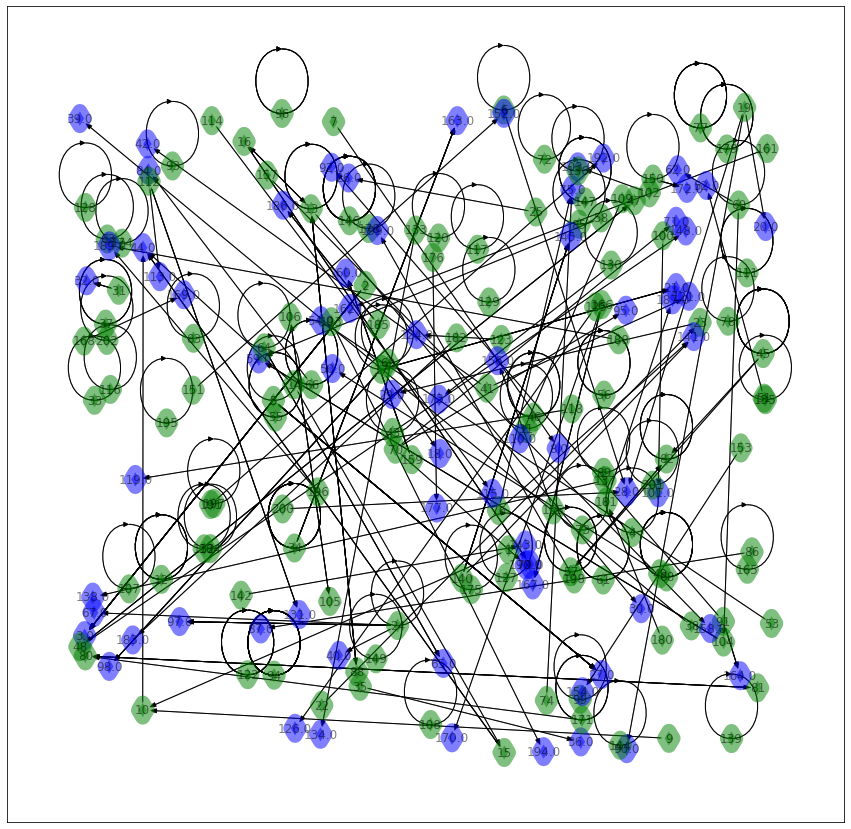

In [9]:
colors = []
pos = nx.random_layout(g)

for node in g:
    if node in df3['node1'].values:
       colors.append('g')
    else: 
       colors.append('b') 
d = nx.degree(g)

d = [(d[node]+1) * 20 for node in g.nodes()]
# d =[float(x) for x in d]
# print(d)
plt.figure(3,figsize=(15,15)) 
print(np.shape(g))
nx.draw_networkx(g,pos, node_size=100, node_color=colors,node_shape="d", alpha=0.5, linewidths=15)
nx.draw_networkx_edges(g, pos, width=1,label=True)
plt.show()